In [3]:
pip install dmba

In [58]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #if numerical use regresssor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
germen_data = dmba.load_data("GermanCredit.csv")
germen_data.head()


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


In [60]:
#1. Pre-process the data

germen_data = germen_data.drop(columns=['OBS#'])

In [67]:
X = germen_data.drop(columns=['RESPONSE'])
y = germen_data['RESPONSE']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1) #40% observations in test set

In [68]:
#2 Run a decision-tree with max depth of 10 and report its performance.
classTree = DecisionTreeClassifier(random_state=0, max_depth=10)
classTree.fit(train_X, train_y) # 1st var is indepen, 2nd is depen


DecisionTreeClassifier(max_depth=10, random_state=0)

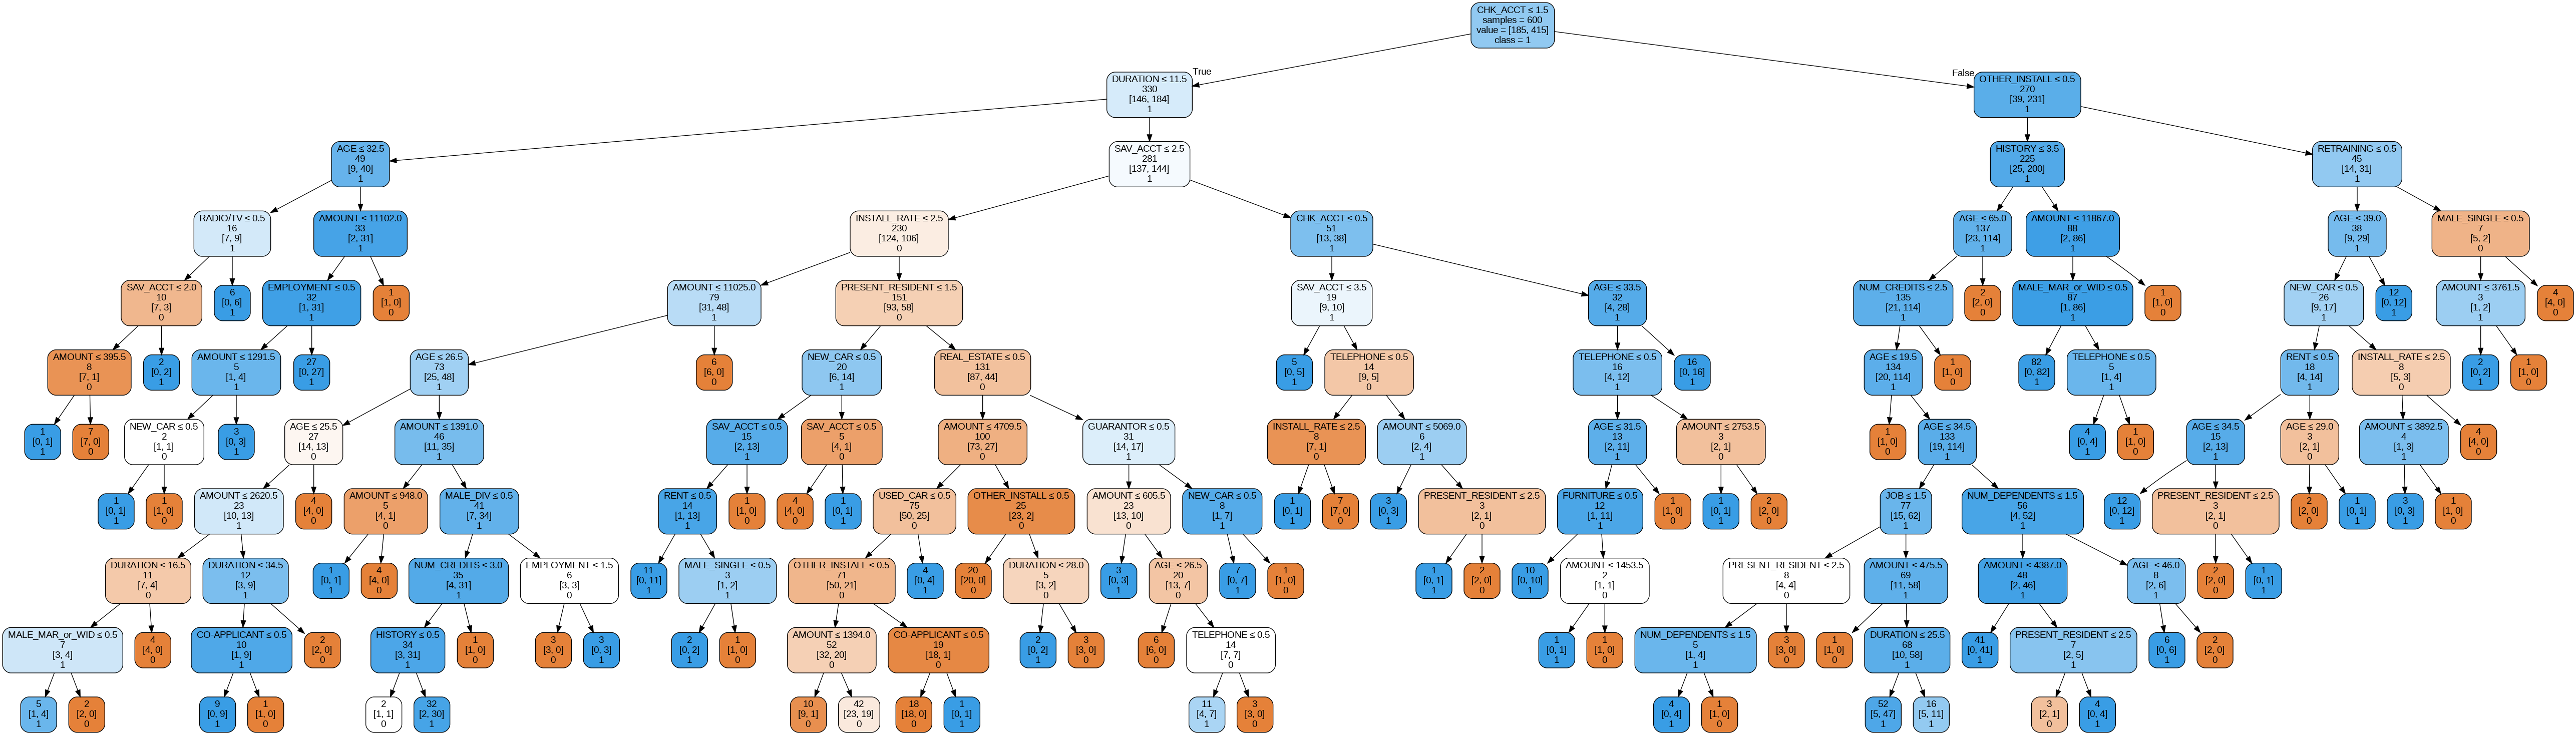

In [69]:
plotDecisionTree(classTree, feature_names=germen_data.columns[:30], class_names=classTree.classes_)

In [70]:
# Performance of DecisionTree using classificationSummary
classificationSummary(train_y, classTree.predict(train_X)) #confu matrix on trainign and test set, usually accuracy of test will be low because of size given
print("Test accuracy: ")
classificationSummary(test_y, classTree.predict(test_X))

Confusion Matrix (Accuracy 0.9350)

       Prediction
Actual   0   1
     0 168  17
     1  22 393
Test accuracy: 
Confusion Matrix (Accuracy 0.6775)

       Prediction
Actual   0   1
     0  54  61
     1  68 217


In [51]:
#3 Now, run a randomforest model with 500 trees and report the performance.
#Do you see any improvement in the prediction accuracy of randomforest model compared to the decision tree?
rf = RandomForestClassifier(oob_score=True,n_estimators=500, random_state=1) # no of tress is n_estimators incase we dont want to use train and test set we can use oob_score=True
rf.fit(X,y)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

In [52]:
rf.oob_score_

0.769

In [56]:
#performance for a randomforest using classification

rf.oob_score_

0.769

In [ ]:
# do you see any improvement from DecisionTree to randomforest
#Yes, the accuracy of test data improved from 0.6775 to 0.769

In [72]:
#4. Run a logistic regression model and report its performance.
lm = LogisticRegression()
lm.fit(train_X,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
#Performance for logit
classificationSummary(train_y, lm.predict(train_X))
classificationSummary(test_y, lm.predict(test_X))

Confusion Matrix (Accuracy 0.7783)

       Prediction
Actual   0   1
     0  89  96
     1  37 378
Confusion Matrix (Accuracy 0.7575)

       Prediction
Actual   0   1
     0  47  68
     1  29 256


In [ ]:
#5. Among all the models that you have run, which one would you select to provide to your manager as the best predictive model? Why?
#Ans: I would suggest randomforest as the best predictive model, as the accuarcy score for randomforest is 0.769 which is higher than logist accuracy score(0.7575),DecisionTree accuracy score(0.6775)